In [26]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
trendwindowtime=[1,5,25,40,80,115,145,170,200,250,290,320,360,400,450]

In [43]:
#ACCURACY
one=[0.49638937, 0.5067935,  0.50943307 ,0.53335539, 0.54822402, 0.57439965,
 0.58324229 ,0.56526645 ,0.59098716, 0.59660228, 0.57926719, 0.57338912,
 0.58891816, 0.55431019, 0.57347143]
two=[0.50245523, 0.50630803, 0.50125415, 0.51390877, 0.53001833, 0.54896383,
 0.5539461,  0.58017731, 0.60294468, 0.60100375, 0.58922458, 0.5940964,
 0.58514104, 0.58527762, 0.58269255]
three=[0.51333526, 0.50943695 ,0.5043522,  0.51269746, 0.52274582 ,0.55607219,
 0.55582602, 0.56281935, 0.59321947 ,0.59245406, 0.59885283, 0.59246602,
 0.58765183 ,0.59529321, 0.58601526]
four=[0.50943578 ,0.50592239, 0.51585878, 0.5253997,  0.53129237 ,0.54007905,
 0.55653181, 0.5533651,  0.57378891, 0.6048939,  0.59511374, 0.59303672,
 0.62900363, 0.58987975 ,0.56791294]
total=[0.50591889, 0.50991845 ,0.5105445 , 0.50091619, 0.51691064, 0.52924058,
 0.54816818, 0.55908247, 0.56798502, 0.56957923, 0.60336561, 0.59692617,
 0.5819648,  0.56398921, 0.59763246, 0.55783502]
onetwo=[0.50474361 ,0.50270836, 0.49002195, 0.52004149 ,0.5352859  ,0.54425108,
 0.54193077 ,0.58963134, 0.61545753, 0.60027805 ,0.5862368,  0.59897464,
 0.59546281, 0.60929482, 0.56395152]
onlyprice=[0.49290977 ,0.49839404, 0.50358658, 0.51642497, 0.54339342, 0.56291648,
 0.57081289, 0.57709866, 0.59383334, 0.59702683 ,0.57000263, 0.55867603,
 0.56661306, 0.55116277, 0.57324156]
pearson20=[0.49699571, 0.49665903, 0.50498084, 0.50859503 ,0.53602166, 0.56358241,
 0.592723  , 0.58026329 ,0.59412346 ,0.58878924 ,0.60950517 ,0.60202846,
 0.60043713 ,0.58740399 ,0.5802584 ]
pearson40=[0.4996185 , 0.49699313 ,0.48773946, 0.51349275 ,0.53167005, 0.53351819,
 0.55824531, 0.58109834, 0.61659259, 0.60034878, 0.57317073 ,0.59370269,
 0.58955983, 0.57040451, 0.58878553]
pearson60=[0.50042918 ,0.50773196, 0.48582375, 0.51315663, 0.5335074 , 0.52028605,
 0.56098396, 0.57397583, 0.60306173, 0.59636273 ,0.57803874 ,0.5846705,
 0.60633323, 0.58556068, 0.58790698]
pearson80=[0.50238436, 0.50267278, 0.4835249,  0.50902718, 0.53312059 ,0.52733995,
 0.56861307 ,0.54892426 ,0.58158025 ,0.57802691 ,0.58466325 ,0.58885861,
 0.58935651, 0.57163338 ,0.58165375]
nocross=[0.49859764, 0.49954816 ,0.4889122 , 0.51461088 ,0.52703645, 0.52013295,
 0.57150887 ,0.60263425, 0.59280722, 0.58941453 ,0.59540567, 0.58668018,
 0.59915259, 0.60034073, 0.59206417]
mutual20=[0.49824311, 0.49805152 ,0.51211254, 0.51276535, 0.53047371, 0.54291388,
 0.55867173 ,0.56372261, 0.58190757, 0.58928571 ,0.58992806, 0.58298172,
 0.58991095, 0.56508665 ,0.58461934]
mutual40=[0.50151947, 0.49710104 ,0.49036719, 0.51147447 ,0.536684 ,  0.52329749,
 0.55594508 ,0.59536385 ,0.59700098, 0.56755952, 0.57484013, 0.58870806,
 0.58748229 ,0.57502548, 0.57196502,]
mutual60=[0.50232669, 0.50418211, 0.48445398, 0.52108434, 0.53148469 ,0.51230263,
 0.53929302, 0.56699922, 0.58618486, 0.60124008 ,0.58922862, 0.58659835,
 0.62204007, 0.57864424, 0.57407407]
mutual80=[0.50541311, 0.50722365 ,0.49394373 ,0.51324345, 0.53312151, 0.52339436,
 0.53617684, 0.56391823, 0.58593904, 0.61364087 ,0.58797962, 0.58006831,
 0.61090872, 0.58735984, 0.58631687]
adasyn40pearson=[0.5092314,  0.5105716 , 0.53561078 ,0.55755241 ,0.55674526 ,0.59552781,
 0.61358814, 0.60652628, 0.63228153 ,0.6326699,  0.60557394, 0.62421302,
 0.62639248, 0.63244805, 0.62546389]
naiveBayesGaussian=[0.49105339, 0.4909975,  0.49222222, 0.49229875, 0.50970637, 0.50191402,
 0.49486876, 0.51680048, 0.50239163, 0.48803419, 0.49701205, 0.48956106,
 0.48322561, 0.51555556 ,0.50985915]
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'

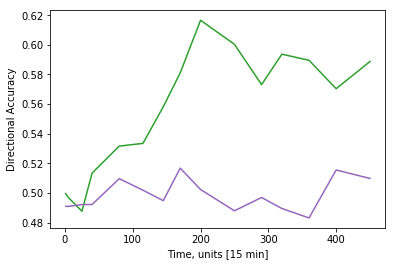

In [47]:
#plt.plot(trendwindowtime, one, color='b' )
#plt.plot(trendwindowtime, two, color='g' )
#plt.plot(trendwindowtime, three, color='r' )
#plt.plot(trendwindowtime, four, color='c' )
#plt.plot(trendwindowtime, total[1:], color='g' )
#plt.plot(trendwindowtime, onetwo, color='k' )
#plt.plot(trendwindowtime, onlyprice, color='m' )
#plt.plot(trendwindowtime, pearson20, color='tab:orange' )
plt.plot(trendwindowtime, pearson40, color='tab:green' )
plt.plot(trendwindowtime, naiveBayesGaussian, color='tab:purple' )
#plt.plot(trendwindowtime, pearson80, color='tab:olive' )
#plt.plot(trendwindowtime, nocross, color='c' )
plt.ylabel('Directional Accuracy')
plt.xlabel('Time, units [15 min]')


plt.show()

In [42]:
#F1score
onef=[0.40496088, 0.40501791, 0.46549038, 0.52037506 ,0.55619497, 0.60118694,
 0.59071302, 0.50433523, 0.59869575, 0.62006372, 0.57637103, 0.55777556,
 0.57945744, 0.50060953, 0.54632381]
twof=[0.38682862, 0.41285225, 0.44628085, 0.52371887, 0.527594 ,  0.53353364,
 0.57175829, 0.57124282, 0.61692628, 0.64263296, 0.61841752, 0.59127556,
 0.59710412 ,0.55524824 ,0.5618976 ]
threef=[0.48206824, 0.4866436 , 0.49858306 ,0.50576754, 0.51480435, 0.55635317,
 0.56716318, 0.56700488, 0.61871089, 0.65795565, 0.6487578,  0.61293049,
 0.6283338,  0.63336293, 0.59073302]
fourf=[0.43533234, 0.45067985, 0.51969861, 0.53535,    0.47806082, 0.50707142,
 0.52475761, 0.48354004, 0.56686562, 0.60183401, 0.6059628,  0.60305263,
 0.57957846, 0.5360304,  0.56382742]
totalf=[0.44411577, 0.46406925 ,0.47069687, 0.49169357 ,0.51848345, 0.50691134,
 0.52688768, 0.59120586, 0.5796843 , 0.57525194, 0.65515883, 0.62167845,
 0.60457781 ,0.57665567 ,0.57053855 ,0.57606149]
onetwof=[0.40055788, 0.42939452 ,0.42808564, 0.47938293, 0.50419442, 0.50277429,
 0.54702739, 0.58368044, 0.6377713,  0.65632709, 0.60910902, 0.62035954,
 0.61649699, 0.58036297 ,0.54814002]
onlypricef=[0.35996813 ,0.38497913, 0.43675983, 0.43408269, 0.52479543, 0.57847752,
 0.57328138 ,0.56913094 ,0.57678448 ,0.62300845, 0.55171392 ,0.55925461,
 0.56740325, 0.50518062, 0.52926024]
pearson20f=[0.33973155, 0.37285778, 0.46832002, 0.46751538, 0.53981538, 0.5663464,
 0.60110391, 0.58263314, 0.60514505, 0.62894583, 0.63354912, 0.61668355,
 0.58378367 ,0.57991966, 0.55716076]
pearson40f=[0.3945348 , 0.40417757, 0.44355182 ,0.51384872 ,0.47441235, 0.46094243,
 0.5574846,  0.58626002, 0.61732508, 0.61420706, 0.56890262 ,0.61106594,
 0.61238087 ,0.58439975, 0.5742342 ]
pearson60f=[0.44530267, 0.45686812, 0.44168386, 0.48788394, 0.4890773,  0.4547506,
 0.55884966, 0.54224635, 0.60699249, 0.63706938, 0.5699108,  0.5900187,
 0.62319781, 0.61146118, 0.58545975]
pearson80f=[0.4358833 , 0.47491205, 0.4453425,  0.49976018, 0.51936628 ,0.46896909,
 0.59296734, 0.54271261, 0.57079155 ,0.61188513, 0.60856984, 0.60297703,
 0.61702342, 0.57684985, 0.59805524]
nocrossf=[0.35825706, 0.41257379 ,0.42603306 ,0.50867701, 0.47282244 ,0.45961734,
 0.59060377, 0.65335591, 0.65435586, 0.64287838 ,0.63362262, 0.62109201,
 0.63432596, 0.63387309, 0.59014821]
mutual20f=[0.36469206 ,0.37881042 ,0.46840733, 0.50040292 ,0.52686636, 0.52891227,
 0.55985112, 0.58129527, 0.59525726, 0.63093754, 0.60729847, 0.58748464,
 0.5726399 , 0.56444512, 0.56536219]
mutual40f=[0.39996531, 0.37351937, 0.43947721, 0.49916263 ,0.51870582, 0.45689889,
 0.55062432, 0.5934581 , 0.58577628 ,0.55556674 ,0.55618326 ,0.59733732,
 0.60889679, 0.55676877 ,0.56164516]
mutualf60=[0.45586705, 0.45944598, 0.43356367 ,0.50215712, 0.49699693, 0.45730836,
 0.53617407 ,0.51894249, 0.56927277, 0.63212119 ,0.60396697 ,0.61374327,
 0.63708417, 0.61459972 ,0.57739976]
mutualf80=[0.43646108, 0.48511577 ,0.46402216, 0.50474787, 0.50947124 ,0.47180348,
 0.51985488 ,0.53032022, 0.58258106, 0.6467679,  0.60809099, 0.59448863,
 0.64030817, 0.62665991 ,0.61655609]
adasyn40pearsonf=[0.59454822, 0.58168092, 0.59905231, 0.66292535, 0.63789881, 0.70649107,
 0.71536969, 0.70632288, 0.67605635, 0.72878298, 0.66374728, 0.66672001,
 0.62455964, 0.67246932, 0.6300048 ]


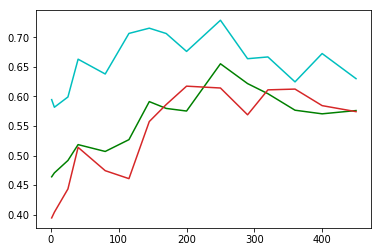

In [40]:
#plt.plot(trendwindowtime, onef, color='b' )
#plt.plot(trendwindowtime, twof, color='g' )
#plt.plot(trendwindowtime, threef, color='r' )
#plt.plot(trendwindowtime, fourf, color='c' )
plt.plot(trendwindowtime, totalf[1:], color='g' )
#plt.plot(trendwindowtime, onetwof, color='k' )
#plt.plot(trendwindowtime, onlypricef, color='m' )

#plt.plot(trendwindowtime, pearson20f, color='tab:orange' )
plt.plot(trendwindowtime, pearson40f, color='tab:red' )
#plt.plot(trendwindowtime, pearson60f, color='tab:purple' )
#plt.plot(trendwindowtime, pearson80f, color='tab:olive' )
#plt.plot(trendwindowtime, nocrossf, color='c' )
plt.plot(trendwindowtime, adasyn40pearsonf, color='c' )
plt.show()

In [ ]:
#BEST COMBINATION UP TO NOW 200 WINDOW AND PEARSON 40 QITH THIS INDICATORS
low             145.44
close_4_sma     145.50
close_2_sma     145.50
close           145.50
middle          145.52
close_6_sma     145.50
close_8_sma     145.50
close_12_ema    145.50
open            145.50
close_10_sma    145.50
close_12_sma    145.50
close_14_sma    145.50
close_16_sma    145.50
close_18_sma    145.50
close_20_sma    145.50
boll            145.50
high            145.62
close_26_ema    145.50
boll_lb            NaN
close_-1_s         NaN
close_-2_s         NaN
boll_ub            NaN
close_-4_s         NaN
close_-6_s         NaN
close_-8_s         NaN
close_-10_s        NaN
close_-12_s        NaN
close_-14_s        NaN
close_-16_s        NaN
atr_14             NaN
atr                NaN
cr-ma3             NaN
rsi_16             NaN
cr-ma2             NaN
rsi_14             NaN
cr-ma1             NaN
macds             0.00
rsi_12             NaN
cr                 NaN
macd              0.00
Name: 2017-07-13 21:30:00, dtype: float64